N = 500
N = 1000
*** DEATH RADIUS IN QUADRANT 60 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 2 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 39 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 1 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 33 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 36 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 63 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 32 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 37 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 30 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 58 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 8 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 21 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 61 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 31 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 34 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 15 INCREASED TO 50.0 ***
*** DEATH RADIUS IN QUADRANT 22 INCREASED TO 50.0 ***
*** DEATH RADI

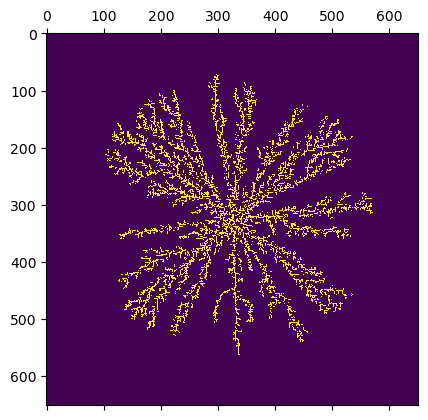

In [157]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

t0 = time.time()
spawn_overlap = 0
particles = 1
part_tot = 25000
size = 651 #size of the grid, must be odd for a center
x0 = int((size - 1) / 2)

e_radius_array = np.zeros([90])
i=0
while i < 90:
    e_radius_array[i] = 16
    i+=1

i=0
d_radius_array = np.zeros([90])
while i < 90:
    d_radius_array[i] = 25
    i+=1

#e_radius_Q1 = 15 #edge radius of quadrant 1
#e_radius_Q2 = 15 #edge radius of q2
#e_radius_Q3 = 15 #edge radius of q3
#e_radius_Q4 = 15 #edge radius of q4
#d_radius_Q1 = 25 # death radius of q1
#d_radius_Q2 = 25 # death radius of q2
#d_radius_Q3 = 25 # death radius of q3
#d_radius_Q4 = 25 # death radius of q4

tree = np.zeros([size, size]) # n X n array means array center is [(n-1)/2,(n-1)/2] when n is odd
tree[x0, x0] = 1
#print("Initial Tree:\n", tree)

def Spawn():
    rand1 = random.randrange(36000)
    angle = (rand1 / 100) * np.pi / 180  #I don't know why, but there appears to be a wierd phase shift here. It makes it work though.

    if 90 > rand1 / 100 >= 0:
        x = -e_radius_array[int(rand1 / 100 / 4)] * np.cos(angle) - x0
        y = e_radius_array[int(rand1 / 100 / 4)] * np.sin(angle) - x0
        return round(x), round(y), int(rand1 / 100 / 4)
    if 180 > rand1 / 100 >= 90:
        x = e_radius_array[int(rand1 / 100 / 4)] * np.cos(angle) - x0
        y = -e_radius_array[int(rand1 / 100 / 4)] * np.sin(angle) - x0
        return round(x), round(y), int(rand1 / 100 / 4)
    if 270 > rand1 / 100 >= 180:
        x = -e_radius_array[int(rand1 / 100 / 4)] * np.cos(angle) - x0
        y = e_radius_array[int(rand1 / 100 / 4)] * np.sin(angle) - x0
        return round(x), round(y), int(rand1 / 100 / 4)
    if 360 > rand1 / 100 >= 270:
        x = e_radius_array[int(rand1 / 100 / 4)] * np.cos(angle) - x0
        y = -e_radius_array[int(rand1 / 100 / 4)] * np.sin(angle) - x0
        return round(x), round(y), int(rand1 / 100 / 4)

'''
    if 22.5 > rand1 / 100 >= 0:
        x = -e_radius_array[0] * np.cos(angle) - x0
        y = e_radius_array[0] * np.sin(angle) - x0
        return round(x), round(y), 0
    elif 45 > rand1 / 100 >= 22.5:
        x = -e_radius_array[1] * np.cos(angle) - x0
        y = e_radius_array[1] * np.sin(angle) - x0
        return round(x), round(y), 1
    elif 67.5 > rand1 / 100 >= 45:
        x = -e_radius_array[2] * np.cos(angle) - x0
        y = e_radius_array[2] * np.sin(angle) - x0
        return round(x), round(y), 2
    elif 90 > rand1 / 100 >= 67.5:
        x = -e_radius_array[3] * np.cos(angle) - x0
        y = e_radius_array[3] * np.sin(angle) - x0
        return round(x), round(y), 3
    elif 112.5 > rand1 / 100 >= 90:
        x = e_radius_array[4] * np.cos(angle) - x0
        y = -e_radius_array[4] * np.sin(angle) - x0
        return round(x), round(y), 4
    elif 135 > rand1 / 100 >= 112.5:
        x = e_radius_array[5] * np.cos(angle) - x0
        y = -e_radius_array[5] * np.sin(angle) - x0
        return round(x), round(y), 5
    elif 157.5 > rand1 / 100 >= 135:
        x = e_radius_array[6] * np.cos(angle) - x0
        y = -e_radius_array[6] * np.sin(angle) - x0
        return round(x), round(y), 6
    elif 180 > rand1 / 100 >= 157.5:
        x = e_radius_array[7] * np.cos(angle) - x0
        y = -e_radius_array[7] * np.sin(angle) - x0
        return round(x), round(y), 7
    elif 202.5 > rand1 / 100 >= 180:
        x = -e_radius_array[8] * np.cos(angle) - x0
        y = e_radius_array[8] * np.sin(angle) - x0
        return round(x), round(y), 8
    elif 225 > rand1 / 100 >= 202.5:
        x = -e_radius_array[9] * np.cos(angle) - x0
        y = e_radius_array[9] * np.sin(angle) - x0
        return round(x), round(y), 9
    elif 247.5 > rand1 / 100 >= 225:
        x = -e_radius_array[10] * np.cos(angle) - x0
        y = e_radius_array[10] * np.sin(angle) - x0
        return round(x), round(y), 10
    elif 270 > rand1 / 100 >= 247.5:
        x = -e_radius_array[11] * np.cos(angle) - x0
        y = e_radius_array[11] * np.sin(angle) - x0
        return round(x), round(y), 11
    elif 292.5 > rand1 / 100 >= 270:
        x = e_radius_array[12] * np.cos(angle) - x0
        y = -e_radius_array[12] * np.sin(angle) - x0
        return round(x), round(y), 12
    elif 315 > rand1 / 100 >= 292.5:
        x = e_radius_array[13] * np.cos(angle) - x0
        y = -e_radius_array[13] * np.sin(angle) - x0
        return round(x), round(y), 13
    elif 337.5 > rand1 / 100 >= 315:
        x = e_radius_array[14] * np.cos(angle) - x0
        y = -e_radius_array[14] * np.sin(angle) - x0
        return round(x), round(y), 14
    elif 360 > rand1 / 100 >= 315:
        x = e_radius_array[15] * np.cos(angle) - x0
        y = -e_radius_array[15] * np.sin(angle) - x0
        return round(x), round(y), 15
'''

i=0
#print(tree)

while particles < part_tot:
    x = 0
    y = 0
    q = 0 #quadrant
    x, y, q = Spawn()
        
    if tree[x, y] == 1:
        #print("*** SPAWN OVERLAP ***")
        spawn_overlap += 1
        if spawn_overlap >= 100000:
            print("****** TOO MANY SPAWN OVERLAPS ******")
            break
        
    else:
        tree[x, y] = 1
        #e_radius = 0
        #d_radius = 0
        
        #if q == 1:
        #    d_radius = d_radius_Q1
        #    e_radius = e_radius_Q1
        #elif q == 2:
        #    d_radius = d_radius_Q2
        #    e_radius = e_radius_Q2
        #elif q == 3:
        #    d_radius = d_radius_Q3
        #    e_radius = e_radius_Q3
        #elif q == 4:
        #    d_radius = d_radius_Q4
        #    e_radius = e_radius_Q4
            
        while i < 1:
            if np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > d_radius_array[q]:
                tree[x,y] = 0
                #print("DEAD***********************************************")
                break
                
            elif tree[x + 1, y] == 1 or tree[x - 1, y] == 1 or tree[x, y + 1] == 1 or tree[x, y - 1] == 1:
                
                particles += 1
                if (particles / 500) == int(particles /500):
                    print("N =", particles)
                    
                if d_radius_array[q] > np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > e_radius_array[q] and d_radius_array[q] < x0:
                    d_radius_array[q] += 5
                    e_radius_array[q] += 5
                    
                    #if q == 1:
                    #    d_radius_Q1 += 5 
                    #    e_radius_Q1 += 5
                    #    d_radius += 5
                    #    e_radius += 5
                    if int(d_radius_array[q] / 50) == d_radius_array[q] / 50:
                        print("*** DEATH RADIUS IN QUADRANT", q + 1, "INCREASED TO", d_radius_array[q], "***")
                    
                break
            
            else:
                rand2 = random.randrange(4)
                if rand2 == 0:
                    tree[x, y] = 0
                    x += 1
                    tree[x, y] = 1
                    #print("down")
                elif rand2 == 1:
                    tree[x, y] = 0
                    x -= 1
                    tree[x, y] = 1
                    #print("up")
                elif rand2 == 2:
                    tree[x, y] = 0
                    y += 1
                    tree[x, y] = 1
                    #print("right")
                elif rand2 == 3:
                    tree[x, y] = 0
                    y -= 1
                    tree[x, y] = 1
                    #print("left")
                
t1 = time.time()
hours = int((t1 - t0) / 3600)
minutes = int(((t1 - t0) / 3600 - hours) * 60)
seconds = int(((((t1 - t0) / 3600 - hours) * 60) - minutes) * 60)
print("*** TIME ELAPSED :", hours, "HOURS,", minutes, "MINUTES, AND", seconds, "SECONDS ***")
print("*** TOTAL PARTICLES =", particles, " ***")
plt.matshow(tree)

1


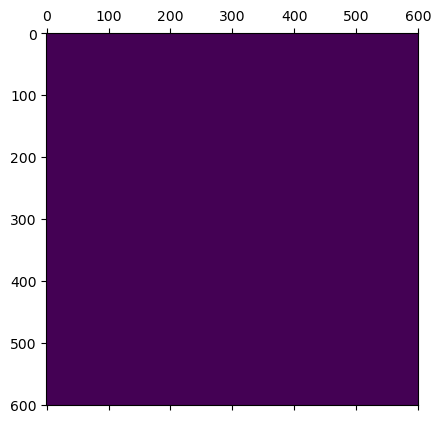

In [145]:
print(particles)
plt.matshow(tree)
#plt.matshow(tree[50:675, 150:700])